<a href="https://colab.research.google.com/github/ohsono/stats414/blob/main/stat414_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_score,recall_score,f1_score

from IPython.display import display
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
pd.set_option('display.max_columns', None)

# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/stat414
# %ls

In [114]:
%cd /content/sample_data/


/content/sample_data


In [115]:
train_ads = pd.read_csv('train_data_ads.csv')
train_ads.head()

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001,ad_click_list_v002,ad_click_list_v003,ad_close_list_v001,ad_close_list_v002,ad_close_list_v003,pt_d,u_newsCatInterestsST,u_refreshTimes,u_feedLifeCycle
0,373250,0,100005,3,2,16,147,2,32,6,35,312,2117,7,14339,19319,6,1846,4,46,1,162,47,14,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0
1,373253,1,100005,3,2,16,147,2,32,6,35,312,2117,7,11923,21714,8,1060,4,37,1,344,20,13,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0
2,373252,1,100005,3,2,16,147,2,32,6,35,312,2117,7,11923,21714,8,1060,4,37,1,344,20,13,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0
3,373251,0,100005,3,2,16,147,2,32,6,35,312,2117,7,28665,20163,8,1542,4,47,1,152,49,17,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0
4,373255,0,100005,3,2,16,147,2,32,6,35,312,2117,7,34041,13608,8,1036,4,44,1,312,43,18,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0


In [116]:
# Check for null values in each column
missing_values = train_ads.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

print(missing_values)

ad_click_list_v002      1
ad_click_list_v003      1
ad_close_list_v001      1
ad_close_list_v002      1
ad_close_list_v003      1
pt_d                    1
u_newsCatInterestsST    1
u_refreshTimes          1
u_feedLifeCycle         1
dtype: int64


In [117]:
# Get global mean
train_ads.label.value_counts()

,count
label,
0,56311
1,835


In [118]:
#cleaning data and recoding
train_ads['ad_cl_cnt1'] = train_ads['ad_click_list_v001'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
train_ads['ad_cl_cnt2'] = train_ads['ad_click_list_v002'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
train_ads['ad_cl_cnt3'] = train_ads['ad_click_list_v003'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)

# sum all ads click counts
train_ads['ad_click_count'] = train_ads['ad_cl_cnt1'] + train_ads['ad_cl_cnt2'] + train_ads['ad_cl_cnt3']


train_ads['ad_clo_cnt1'] = train_ads['ad_close_list_v001'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
train_ads['ad_clo_cnt2'] = train_ads['ad_close_list_v002'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
train_ads['ad_clo_cnt3'] = train_ads['ad_close_list_v003'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
# sum all ads close counts
train_ads['ad_close_count'] = train_ads['ad_clo_cnt1'] + train_ads['ad_clo_cnt2'] + train_ads['ad_clo_cnt3']

In [119]:
#select only data to train our model
X_train_ads = train_ads[['age', 'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_size', 'app_score', 'ad_click_count','ad_close_count']]
Y = train_ads['label']


In [120]:
# Split traing data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_train_ads, Y, test_size=0.20, random_state=42)

#need to rename label > churn
# y_train = df_train.churn.values
# y_val = df_val.churn.values

# del df_train['churn']
# del df_val['churn']

#y_train = df_train.values
#y_val = df_val.values

In [121]:
# Get value counts for each column in X_train and X_test
for column in X_train.columns:
    print(f"X_train[{column}]:\n{X_train[column].value_counts()}\n")

for column in X_test.columns:
    print(f"X_test[{column}]:\n{X_test[column].value_counts()}\n")

# Get value counts for y_train and y_test to prove 80/20 split of data
print("y_train:\n{}\n".format(y_train.value_counts()))
print("y_test:\n{}\n".format(y_test.value_counts()))

X_train[age]:
age
8    9890
7    9733
3    9615
6    5467
5    5234
2    4239
9     895
4     643
Name: count, dtype: int64

X_train[city_rank]:
city_rank
2    19380
5    12631
4     6894
3     6811
Name: count, dtype: int64

X_train[series_dev]:
series_dev
16    9227
30    6820
27    5466
31    5336
11    4843
34    4397
32    2684
17    1590
23    1281
19    1167
21     698
24     600
26     442
33     230
15     197
14     193
12     192
28     157
20     106
36      89
29       1
Name: count, dtype: int64

X_train[series_group]:
series_group
3    12156
5     9227
2     6313
6     5628
8     5035
7     4839
4     2518
Name: count, dtype: int64

X_train[emui_dev]:
emui_dev
20    8143
11    7488
21    7258
35    4120
28    3892
13    2405
19    2336
29    2326
32    1968
30    1578
23    1271
36     800
16     506
31     463
18     459
17     320
14     159
12     113
34      57
37      31
33      16
25       7
Name: count, dtype: int64

X_train[device_size]:
device_size
2117    8659


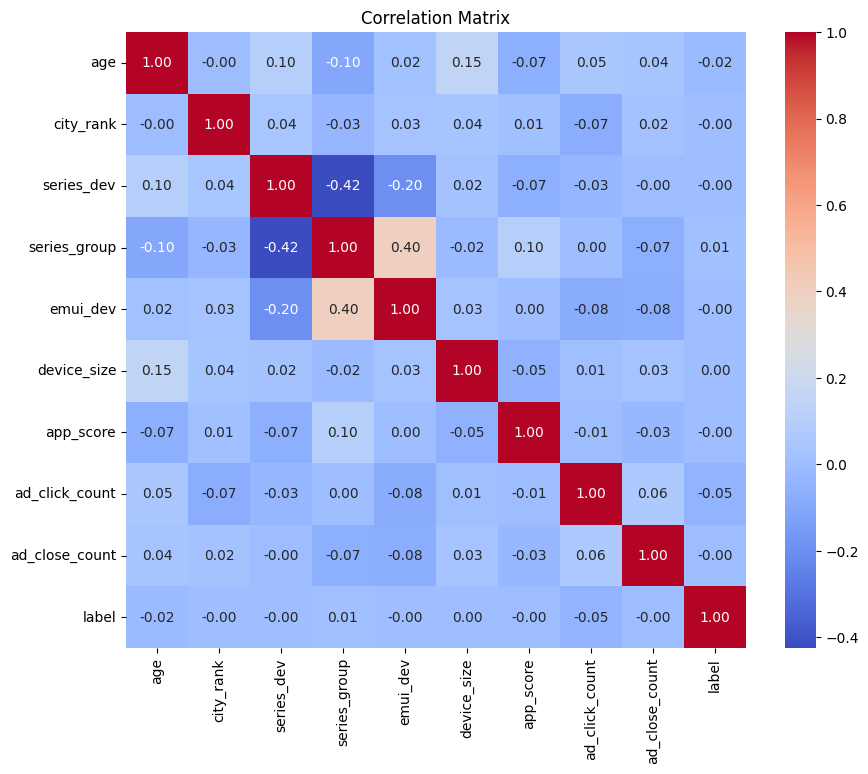

In [122]:
numerical_features = ['age', 'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_size', 'app_score', 'ad_click_count','ad_close_count']
#df_numerical = df_train[numerical_features]
#correlation_matrix = df_numerical.corr()
#correlation_matrix = df_train[numerical_features].corr()

#combine X_train and y_train data into df_numerical
df_numerical=X_train[numerical_features]
df_numerical['label']=y_train
correlation_matrix = df_numerical.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [123]:
# Extract correlation of each feature with 'label'
label_correlation = correlation_matrix['label'].sort_values(ascending=False)

# Display results
print(label_correlation)

label             1.000000
series_group      0.011655
device_size       0.002995
series_dev       -0.000533
emui_dev         -0.000849
city_rank        -0.001395
app_score        -0.001837
ad_close_count   -0.004910
age              -0.017491
ad_click_count   -0.048608
Name: label, dtype: float64


In [124]:
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precison = precision_score(y_test, y_pred,zero_division=0)
recall = recall_score(y_test, y_pred,zero_division=0)
f1 = f1_score(y_test, y_pred,zero_division=0)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
# print Confusion matrix and AUC
print("confusion Matrix:\n")
print(pd.DataFrame(conf_matrix,
                   columns=["Predict Down","Predict Up"],
                   index=['Actual Down','Actual Up']))
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nprecison:{:.2f}".format(precison))
print("\nrecall:{:.2f}".format(recall))
print("\nf1:{:.2f}".format(f1))

confusion Matrix:

             Predict Down  Predict Up
Actual Down         11263           0
Actual Up             167           0

Accuracy: 0.99

precison:0.00

recall:0.00

f1:0.00


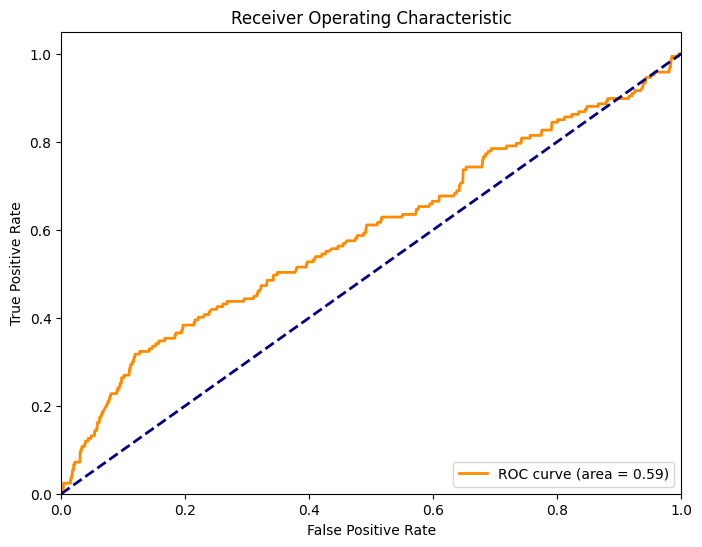

In [129]:

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()